# BBands计算

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 数据加载

In [2]:
df = pd.read_csv('./btc_usdt_day_price.csv', index_col='datetime', parse_dates=True)

In [3]:
df.head()

open     high      low    close        vol    symbol
datetime                                                                    
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT

## 2. 手动实现

In [4]:
def calc_bbands(prices, n=20, m=2):
    """
        布林带计算过程的实现
    """
    middle_vals = prices.rolling(n).mean()     # 中轨，n日均线
    std_vals = prices.rolling(n).std(ddof=0)   # n日标准差
    upper_vals = middle_vals + m * std_vals    # 上轨
    lower_vals = middle_vals - m * std_vals    # 下轨

    return upper_vals, middle_vals, lower_vals

In [5]:
upper, middle, lower = calc_bbands(df['close'])

In [6]:
df['boll_upper1'] = upper
df['boll_middle1'] = middle
df['boll_lower1'] = lower

In [8]:
df.head(30)

open     high      low    close          vol  \
datetime                                                               
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00    19.260000   
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00     0.580096   
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70    20.739843   
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95    19.259580   
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00     8.658607   
2017-10-15 16:00:00  5848.00  5848.00  5848.00  5848.00     0.000000   
2017-10-16 16:00:00  5848.00  5848.00  5501.01  5598.38    17.862095   
2017-10-17 16:00:00  5598.38  5635.08  5159.00  5159.00    10.705649   
2017-10-18 16:00:00  5159.00  5730.98  5159.00  5630.00    20.302000   
2017-10-19 16:00:00  5630.00  5998.98  5536.05  5900.02    36.322792   
2017-10-20 16:00:00  5900.02  6174.99  5849.00  6050.03    17.782552   
2017-10-21 16:00:00  6050.03  6098.00  5694.32  5987.54    41.363613   
2017-10-22 16:00:00  5987.54  6020.00  5682.00  5690.00    50.766829   
2017-10-23 16:00:00  5690.00  5927.82  5530.01  5719.86    20.083042   
2017-10-24 16:00:00  5719.86  5719.86  5355.00  5355.01    27.089088   
2017-10-25 16:00:00  5355.01  5920.00  5330.70  5920.00    51.496206   
2017-10-26 16:00:00  5920.00  5999.00  5612.80  5799.99    50.478083   
2017-10-27 16:00:00  5799.99  5841.00  5491.50  5521.81    85.313246   
2017-10-28 16:00:00  5521.81  5900.00  5521.81  5900.00   113.125531   
2017-10-29 16:00:00  5900.00  6200.23  5898.00  6041.27   241.496891   
2017-10-30 16:00:00  6041.27  6381.52  6017.17  6335.00    91.365752   
2017-10-31 16:00:00  6335.00  6612.91  6280.00  6544.12   332.732592   
2017-11-01 16:00:00  6544.12  7088.00  6544.12  7000.00   626.559265   
2017-11-02 16:00:00  7000.00  7360.58  6850.00  7318.58   398.834596   
2017-11-03 16:00:00  7318.58  7318.58  6974.89  7299.00   315.700000   
2017-11-04 16:00:00  7299.00  7500.00  7285.20  7453.39   388.380000   
2017-11-05 16:00:00  7453.39  7520.00  7100.00  7260.35   427.620000   
2017-11-06 16:00:00  7260.35  7279.88  6960.01  7048.96   429.240000   
2017-11-07 16:00:00  7031.92  7522.00  6958.00  7502.99   627.920000   
2017-11-08 16:00:00  7504.99  7799.00  7070.01  7145.23  1098.500000   

                       symbol  boll_upper1  boll_middle1  boll_lower1  
datetime                                                               
2017-10-10 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-11 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-12 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-13 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-14 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-15 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-16 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-17 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-18 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-19 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-20 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-21 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-22 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-23 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-24 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-25 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-26 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-27 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-28 16:00:00  BTC/USDT          NaN           NaN          NaN  
2017-10-29 16:00:00  BTC/USDT  6323.082066     5672.5280  5021.973934  
2017-10-30 16:00:00  BTC/USDT  6353.637363     5744.2280  5134.818637  
2017-10-31 16:00:00  BTC/USDT  6422.889455     5821.9840  5221.

## 3. 利用TA-Lib

In [9]:
import talib

In [10]:
upper, middle, lower = talib.BBANDS(df['close'], timeperiod=20, nbdevdn=2, nbdevup=2)

In [11]:
df['boll_upper2'] = upper
df['boll_middle2'] = middle
df['boll_lower2'] = lower

In [14]:
df[df.index >= '20171029'].head(10)

open     high      low    close         vol    symbol  \
datetime                                                                        
2017-10-29 16:00:00  5900.00  6200.23  5898.00  6041.27  241.496891  BTC/USDT   
2017-10-30 16:00:00  6041.27  6381.52  6017.17  6335.00   91.365752  BTC/USDT   
2017-10-31 16:00:00  6335.00  6612.91  6280.00  6544.12  332.732592  BTC/USDT   
2017-11-01 16:00:00  6544.12  7088.00  6544.12  7000.00  626.559265  BTC/USDT   
2017-11-02 16:00:00  7000.00  7360.58  6850.00  7318.58  398.834596  BTC/USDT   
2017-11-03 16:00:00  7318.58  7318.58  6974.89  7299.00  315.700000  BTC/USDT   
2017-11-04 16:00:00  7299.00  7500.00  7285.20  7453.39  388.380000  BTC/USDT   
2017-11-05 16:00:00  7453.39  7520.00  7100.00  7260.35  427.620000  BTC/USDT   
2017-11-06 16:00:00  7260.35  7279.88  6960.01  7048.96  429.240000  BTC/USDT   
2017-11-07 16:00:00  7031.92  7522.00  6958.00  7502.99  627.920000  BTC/USDT   

                     boll_upper1  boll_middle1  boll_lower1  boll_upper2  \
datetime                                                                   
2017-10-29 16:00:00  6323.082066     5672.5280  5021.973934  6323.082066   
2017-10-30 16:00:00  6353.637363     5744.2280  5134.818637  6353.637363   
2017-10-31 16:00:00  6422.889455     5821.9840  5221.078545  6422.889455   
2017-11-01 16:00:00  6673.257682     5884.8990  5096.540318  6673.257682   
2017-11-02 16:00:00  6963.708353     5958.3305  4952.952647  6963.708353   
2017-11-03 16:00:00  7191.386853     6030.8805  4870.374147  7191.386853   
2017-11-04 16:00:00  7422.263963     6111.1500  4800.036037  7422.263963   
2017-11-05 16:00:00  7573.720825     6194.2485  4814.776175  7573.720825   
2017-11-06 16:00:00  7630.008169     6288.7465  4947.484831  7630.008169   
2017-11-07 16:00:00  7786.671619     6382.3960  4978.120381  7786.671619   

                     boll_middle2  boll_lower2  
datetime                                        
2017-10-29 16:00:00     5672.5280  5021.973934  
2017-10-30 16:00:00     5744.2280  5134.818637  
2017-10-31 16:00:00     5821.9840  5221.078545  
2017-11-01 16:00:00     5884.8990  5096.540318  
2017-11-02 16:00:00     5958.3305  4952.952647  
2017-11-03 16:00:00     6030.8805  4870.374147  
2017-11-04 16:00:00     6111.1500  4800.036037  
2017-11-05 16:00:00     6194.2485  4814.776175  
2017-11-06 16:00:00     6288.7465  4947.484831  
2017-11-07 16:00:00     6382.3960  4978.120381

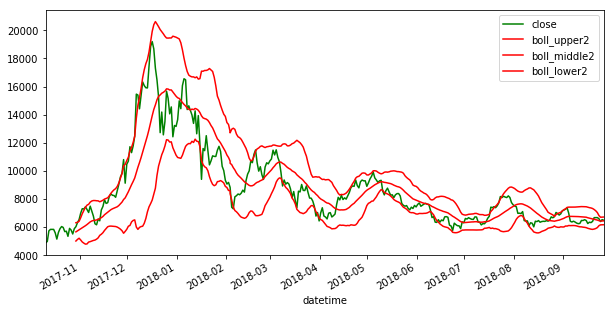

In [15]:
ax1 = plt.subplot(111)
df[['close']].plot(kind='line', figsize=(10, 5), color='g', ax=ax1)
df[['boll_upper2', 'boll_middle2', 'boll_lower2']].plot(kind='line', color='r', ax=ax1)